# **Perform data cleaning and exploratory data analysis on a data set of your choice, such as the Titanic data set from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [20]:
#First load the dataset and display it to know what kind of dataset we are dealing with.
#This is also done to understand the patterns in the dataset.
df = pd.read_csv('/content/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Now perform data exploration.
Explore the data and find the trends and patterns in the dataset.
This is done for feature extraction and feature selection.


In [7]:
df.shape #column:12, rows:891

(891, 12)

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.info()# classification and regression models cannot take in alphabets.They only deal with numerical values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

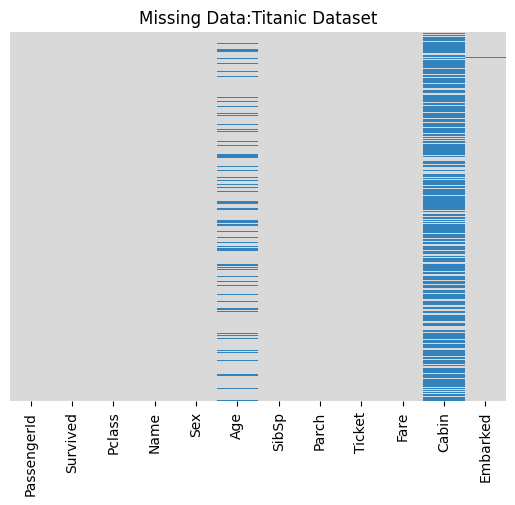

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')
plt.title("Missing Data:Titanic Dataset")
plt.show()

Looks like we have alot of missing values in the "age" and "Cabin Dataset.
So we must find the corrilation between the columns to find the patterns in the dataset. Based on that we will remove columns which have little or no effect on the prediction model.

In [17]:
#We choose "Survive" as our target variable.
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,fmt=".2f")
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [21]:
#The Name, Embarked, Ticket, PassengerId, Cabin of a person do not play any role in the survival of the person so we will drop these columns.
df.drop(['Name',"Embarked","Ticket","Cabin","PassengerId"],axis=1,inplace=True)

In [22]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,fmt=".2f")
plt.show()

ValueError: could not convert string to float: 'male'

In [23]:
#Since male and female are two cateagories we can take them as "0" or "1".
df['Sex'].replace(['male','female'],[0,1],inplace=True)

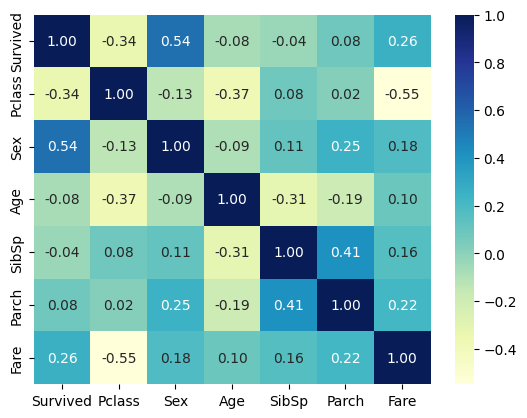

In [24]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,fmt=".2f")
plt.show()

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [26]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [27]:
#If we want to remove the missing values we can do the following.
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

Also keep in mind that dropping too many rows or columns can have a bad impact on the model so make sure to look into the data before you drop any rows and columns . another way of dealing with these missing values is by preprocessing the data.
Another way is by adding new values according to the data set

In [ ]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass ==1:
      return 34
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age


df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)
# Use this if you don't want to drop the values and just fill in new values

In [29]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,0.538826,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,-0.155460,-0.369226,0.067247,0.025683,-0.554182
Sex,0.538826,-0.155460,1.000000,-0.093254,0.103950,0.246972,0.184994
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,0.103950,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,0.246972,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,0.184994,0.096067,0.138329,0.205119,1.000000


In [30]:
df.count()

Survived    714
Pclass      714
Sex         714
Age         714
SibSp       714
Parch       714
Fare        714
dtype: int64

Now we can see that after dropping the null values the dataset has been cleaned and there are no missing values.

In [33]:
#Now checking the info to make sure that the data is ready to be fed to the model to make predictions.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


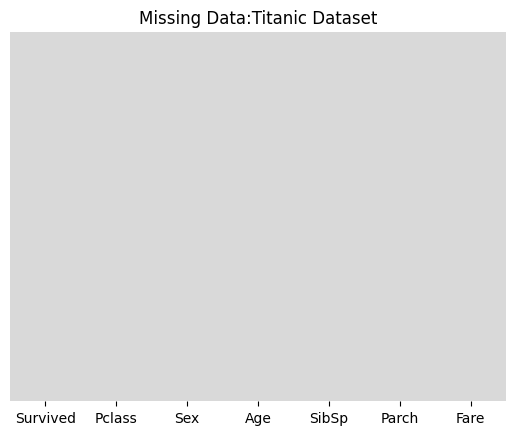

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')
plt.title("Missing Data:Titanic Dataset")
plt.show()